# Analyzing a time series data from a transcriptome dataset
In this notebook we will use a 'real' transcriptome dataset to perform a full data analyis
**Note:** since I am planning using vizualization, I will import a set of libraries not yet covered in this course. During the course we will detail the use of each of them

In [1]:
# Import libraries that will be used.
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
%matplotlib inline


### The datasets consists in 3 time series data of a organism submitted to a stress condition
For simplicity we will use only ~1000 genes for each condition.
Our objective is to import, describe, clean and perform basic analysis in this data

### Importing the data
Since Jutpyter does not allow the use of library such as argparse we will hard code the data import. However, this should never be the case in a production script (you never know how many files you will need to import beforehand !)

In [2]:
#import datasets
df_time1 = pd.read_csv("test-data/tempo1_trinotate_results_filtered.csv", sep="\t")
df_time2 = pd.read_csv("test-data/tempo2_trinotate_results_filtered.csv", sep="\t")
df_time3 = pd.read_csv("test-data/tempo3_trinotate_results_filtered.csv", sep="\t")

In [3]:
# print first columns of data for inspection
df_time1.head()


,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO2139267|c0_g1_i8,-10.269,1.000000e-14,1.600000e-09,.
1,EDO61712|c1_g3_i1,-11.645,4.100000e-14,2.700000e-09,.
2,EDO2102112|c1_g2_i3,-11.645,5.300000e-14,2.700000e-09,"PIP22_MAIZE^PIP22_MAIZE^Q:1-81,H:265-291^92.59..."
3,EDO212082|c0_g2_i1,11.503,1.200000e-13,4.400000e-09,"CHS2_RUTGR^CHS2_RUTGR^Q:94-1263,H:4-393^69.487..."
4,EDO63554|c1_g4_i8,-11.690,1.400000e-13,4.400000e-09,.


In [4]:
# Get a summary of the datasets
def summary(df):
    # Identify the Data Types
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])

    # Identify the unique values
    s_df['Nunique'] = df.nunique()

    # Identify the Missing values
    s_df['MissingValues'] = df.isnull().sum()

    # Identify the count for each variable
    s_df['Count'] = df.count()

    # Identify the zero values for each variable
    s_df['ZeroValues'] = (df == 0).sum()

    print(s_df)

    
    
# Call the summary function
list_of_dfs = [df_time1, df_time2, df_time3]


for i, df in enumerate(list_of_dfs):
    print('\n\n#### Time', i+1, ' Summary###')
    summary(df)




#### Time 1  Summary###
                        Dtype  Nunique  MissingValues  Count  ZeroValues
id                     object     9987              0   9987           0
log_FC                float64     5380              0   9987           0
edger.p.value         float64      445              0   9987           0
edger.adj.p.value     float64      264              0   9987           0
sprot_Top_BLASTX_hit   object     5864              0   9987           0


#### Time 2  Summary###
                        Dtype  Nunique  MissingValues  Count  ZeroValues
id                     object     9997              0   9997           0
log_FC                float64     5912              0   9997           0
edger.p.value         float64      545              0   9997           0
edger.adj.p.value     float64      369              0   9997           0
sprot_Top_BLASTX_hit   object     5684              0   9997           0


#### Time 3  Summary###
                        Dtype  Nunique  Missin

In [5]:
# Get a description of our data
def describe(df):
    # print stats of all numeric columns
    print(df.describe(include=['number']))
    
    
    
    # print stats of all Categorical columns
    print(df.describe(include=['object']))

    
    
for i, df in enumerate(list_of_dfs):
    print('\n\n#### Time', i+1, ' description ###')
    describe(df)



#### Time 1  description ###
            log_FC  edger.p.value  edger.adj.p.value
count  9987.000000   9.987000e+03       9.987000e+03
mean      4.037168   7.015362e-03       1.703085e-01
std       6.122448   5.734893e-03       8.470813e-02
min     -12.259000   1.000000e-14       1.600000e-09
25%       3.122000   1.700000e-03       1.100000e-01
50%       6.774000   5.900000e-03       1.800000e-01
75%       8.122000   1.200000e-02       2.400000e-01
max      13.955000   1.900000e-02       3.000000e-01
                        id sprot_Top_BLASTX_hit
count                 9987                 9987
unique                9987                 5864
top     EDO287792|c0_g2_i1                    .
freq                     1                 4096


#### Time 2  description ###
            log_FC  edger.p.value  edger.adj.p.value
count  9997.000000   9.997000e+03       9.997000e+03
mean      0.241066   1.316223e-02       2.540905e-01
std       5.888273   1.098883e-02       1.416651e-01
min     -

In [6]:
# filter data for entries where the p-value and adjusted p-value are < 0.05
def filter_p_value(df):
    df_filtered = df[ (df['edger.p.value'] <= 0.05) & (df['edger.adj.p.value'] <= 0.05) ]
    return df_filtered


list_of_filtered_df = list()

# Call the function and  put the returning df inside of list_of_filtered_df
for df in list_of_dfs:
    df_filtered = filter_p_value(df)
    list_of_filtered_df.append(df_filtered)
    

list_of_filtered_df[0]

,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO2139267|c0_g1_i8,-10.269,1.000000e-14,1.600000e-09,.
1,EDO61712|c1_g3_i1,-11.645,4.100000e-14,2.700000e-09,.
2,EDO2102112|c1_g2_i3,-11.645,5.300000e-14,2.700000e-09,"PIP22_MAIZE^PIP22_MAIZE^Q:1-81,H:265-291^92.59..."
3,EDO212082|c0_g2_i1,11.503,1.200000e-13,4.400000e-09,"CHS2_RUTGR^CHS2_RUTGR^Q:94-1263,H:4-393^69.487..."
4,EDO63554|c1_g4_i8,-11.690,1.400000e-13,4.400000e-09,.
5,EDO2102373|c1_g1_i7,11.049,2.200000e-12,5.700000e-08,"RENT1_ARATH^RENT1_ARATH^Q:190-3933,H:1-1233^82..."
6,EDO294390|c0_g2_i7,11.691,3.100000e-12,6.900000e-08,"DNJH_CUCSA^DNJH_CUCSA^Q:129-1268,H:1-376^73.49..."
7,EDO294141|c0_g1_i2,8.269,6.700000e-12,1.300000e-07,"HSP11_SOYBN^HSP11_SOYBN^Q:181-657,H:1-153^73.5..."
8,EDO291481|c0_g1_i1,-6.715,9.500000e-12,1.600000e-07,"PRX2B_ARATH^PRX2B_ARATH^Q:735-986,H:79-162^78...."
9,EDO294141|c0_g1_i3,8.995,1.300000e-11,1.800000e-07,"HSP12_MEDSA^HSP12_MEDSA^Q:181-510,H:1-109^72.7..."


In [7]:
list_of_filtered_df[0].head()


,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO2139267|c0_g1_i8,-10.269,1.000000e-14,1.600000e-09,.
1,EDO61712|c1_g3_i1,-11.645,4.100000e-14,2.700000e-09,.
2,EDO2102112|c1_g2_i3,-11.645,5.300000e-14,2.700000e-09,"PIP22_MAIZE^PIP22_MAIZE^Q:1-81,H:265-291^92.59..."
3,EDO212082|c0_g2_i1,11.503,1.200000e-13,4.400000e-09,"CHS2_RUTGR^CHS2_RUTGR^Q:94-1263,H:4-393^69.487..."
4,EDO63554|c1_g4_i8,-11.690,1.400000e-13,4.400000e-09,.


In [8]:
list_of_filtered_df[1].head()


,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO294912|c0_g1_i1,12.131,8.300000e-22,1.100000e-16,"WNK5_ARATH^WNK5_ARATH^Q:757-2004,H:13-423^70.4..."
1,EDO25036|c0_g1_i1,10.526,2.300000e-20,1.400000e-15,"PME21_SOLLC^PME21_SOLLC^Q:233-1321,H:63-426^58..."
2,EDO293504|c1_g2_i1,-10.920,7.100000e-18,2.800000e-13,"PSF2_ARATH^PSF2_ARATH^Q:497-1108,H:1-203^69.11..."
3,EDO24554|c0_g1_i1,-11.147,8.800000e-18,2.800000e-13,"AAP7_ARATH^AAP7_ARATH^Q:1202-2266,H:107-465^61..."
4,EDO217304|c0_g3_i1,10.791,1.000000e-16,2.200000e-12,"RD23C_ARATH^RD23C_ARATH^Q:5-469,H:264-419^81.7..."


In [9]:
list_of_filtered_df[2].head()

,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO293613|c0_g1_i3,-12.200,6.700000e-35,8.400000e-30,"LACS4_ARATH^LACS4_ARATH^Q:266-2227,H:4-657^77...."
1,EDO294858|c0_g1_i2,12.539,1.600000e-33,1.000000e-28,"IKU2_ARATH^IKU2_ARATH^Q:134-3007,H:2-968^52.35..."
2,EDO62606|c0_g1_i1,11.871,8.700000e-33,3.700000e-28,"C3H44_ARATH^C3H44_ARATH^Q:286-2751,H:13-775^48..."
3,EDO24129|c2_g2_i2,12.331,6.600000e-32,2.100000e-27,.
4,EDO619091|c0_g1_i1,12.092,8.200000e-31,1.900000e-26,.


### Now what I want is to intersect the tables by ID. I will keep the log_FC of each time for further analysis and discard the p-values, since they have already been filtered for.

In [10]:

def extract_columns(list_of_dfs):
       
    
    # create a list to put the dfs that will have to column dropped
    list_of_drop_dfs = list()
    
    # Drop columns that will not be used
    for df in list_of_dfs:
        df_d = df.drop(['edger.p.value', 'edger.adj.p.value', 'sprot_Top_BLASTX_hit'], axis=1)
        list_of_drop_dfs.append(df_d)
        
        # More pythonic
        #list_of_drop_dfs.append(df.drop(['edger.p.value', 'edger.adj.p.value', 'sprot_Top_BLASTX_hit'], axis=1))
        
    return list_of_drop_dfs
    

# We need to put the blast annotation in a separate df
df_annot = list_of_filtered_df[0].filter(items=['id','sprot_Top_BLASTX_hit'])

list_of_drop_dfs = extract_columns(list_of_filtered_df)

list_of_drop_dfs[0].head()

    
    


,id,log_FC
0,EDO2139267|c0_g1_i8,-10.269
1,EDO61712|c1_g3_i1,-11.645
2,EDO2102112|c1_g2_i3,-11.645
3,EDO212082|c0_g2_i1,11.503
4,EDO63554|c1_g4_i8,-11.690


In [11]:
df_annot.head()

,id,sprot_Top_BLASTX_hit
0,EDO2139267|c0_g1_i8,.
1,EDO61712|c1_g3_i1,.
2,EDO2102112|c1_g2_i3,"PIP22_MAIZE^PIP22_MAIZE^Q:1-81,H:265-291^92.59..."
3,EDO212082|c0_g2_i1,"CHS2_RUTGR^CHS2_RUTGR^Q:94-1263,H:4-393^69.487..."
4,EDO63554|c1_g4_i8,.


In [12]:
# This is the easy way to do a merge, however it is not very practical 
# when you don't know beforehand tha number 
# of files that will be merged

df4 = pd.merge(list_of_drop_dfs[0], list_of_drop_dfs[1], how='inner', on=['id'])

df5 = pd.merge(df4, list_of_drop_dfs[2], how='inner', on=['id'])

summary(df5)

            Dtype  Nunique  MissingValues  Count  ZeroValues
id         object       49              0     49           0
log_FC_x  float64       49              0     49           0
log_FC_y  float64       49              0     49           0
log_FC    float64       49              0     49           0


In [13]:
# use recursion to merge de dfs
def intersect_recursive(list_of_dfs):
    
    if len(list_of_dfs) == 1:
        return list_of_dfs[0]
    
    else:
        head = list_of_dfs[0]
        smaller_list = list_of_dfs[1:]
        return pd.merge(head, intersect_recursive(smaller_list), how='inner', on=['id'])


df_time_intersec = intersect_recursive(list_of_drop_dfs)
df_time_intersec

,id,log_FC,log_FC_x,log_FC_y
0,EDO2102373|c1_g1_i7,11.049,9.919,10.253
1,EDO294141|c0_g1_i2,8.269,7.521,2.527
2,EDO294141|c0_g1_i3,8.995,9.524,2.638
3,EDO62622|c0_g2_i3,9.636,8.745,9.088
4,EDO2178796|c0_g1_i10,8.185,8.450,5.725
5,EDO2102358|c1_g2_i2,9.484,8.640,9.241
6,EDO2101679|c0_g1_i5,9.387,8.253,7.660
7,EDO4119595|c0_g1_i2,9.370,9.332,-8.251
8,EDO212527|c0_g3_i1,9.320,7.531,4.517
9,EDO216194|c0_g1_i2,-7.241,-3.982,-5.990


In [14]:
def factorial_recursive(n):
    # Base case: 1! = 1
    if n == 1:
        return 1

    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial_recursive(n-1)
    
factorial_recursive(5)


120

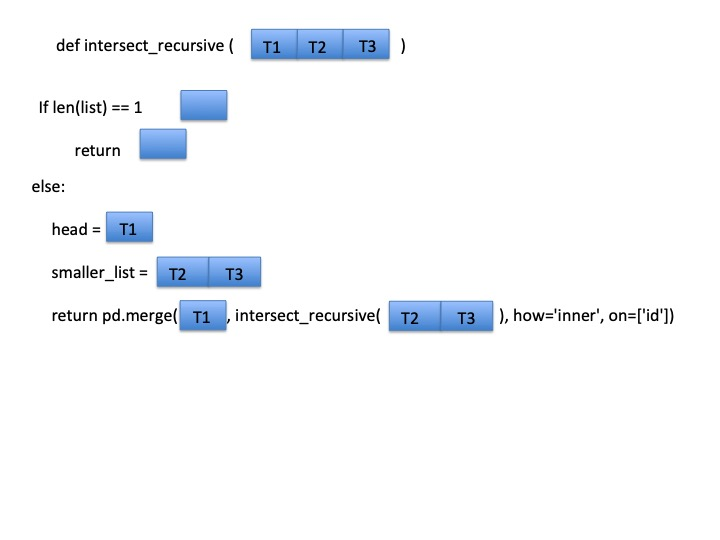

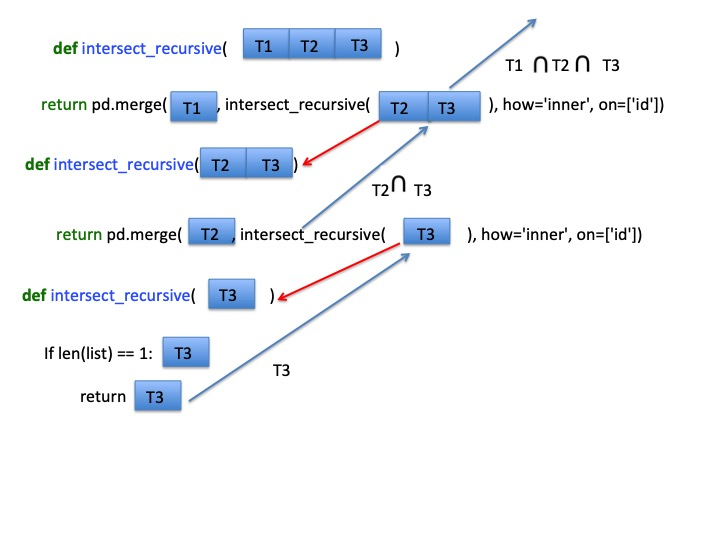

In [17]:
# Now let's put back the annotation.
df_time_annot_intersec = pd.merge(df_time_intersec, df_annot, how='inner', on=['id'])
df_time_annot_intersec

,id,log_FC,log_FC_x,log_FC_y,sprot_Top_BLASTX_hit
0,EDO2102373|c1_g1_i7,11.049,9.919,10.253,"RENT1_ARATH^RENT1_ARATH^Q:190-3933,H:1-1233^82..."
1,EDO294141|c0_g1_i2,8.269,7.521,2.527,"HSP11_SOYBN^HSP11_SOYBN^Q:181-657,H:1-153^73.5..."
2,EDO294141|c0_g1_i3,8.995,9.524,2.638,"HSP12_MEDSA^HSP12_MEDSA^Q:181-510,H:1-109^72.7..."
3,EDO62622|c0_g2_i3,9.636,8.745,9.088,"AROC1_SOLLC^AROC1_SOLLC^Q:402-1565,H:51-438^85..."
4,EDO2178796|c0_g1_i10,8.185,8.450,5.725,"AEDO_HUMAN^AEDO_HUMAN^Q:592-1083,H:48-224^32.7..."
5,EDO2102358|c1_g2_i2,9.484,8.640,9.241,.
6,EDO2101679|c0_g1_i5,9.387,8.253,7.660,"GAGT3_ARATH^GAGT3_ARATH^Q:269-1945,H:74-637^64..."
7,EDO4119595|c0_g1_i2,9.370,9.332,-8.251,"ATL11_ARATH^ATL11_ARATH^Q:369-1361,H:58-377^41..."
8,EDO212527|c0_g3_i1,9.320,7.531,4.517,.
9,EDO216194|c0_g1_i2,-7.241,-3.982,-5.990,"RIP7_ORYSJ^RIP7_ORYSJ^Q:3-128,H:121-161^64.286..."


In [18]:
# Let's rename the logFc columns to something more useful
df_time_annot_intersec.rename(index=str, columns={"log_FC": "Time1", "log_FC_x": "Time2", "log_FC_y": "Time3"}, inplace=True)
df_time_annot_intersec.head()

,id,Time1,Time2,Time3,sprot_Top_BLASTX_hit
0,EDO2102373|c1_g1_i7,11.049,9.919,10.253,"RENT1_ARATH^RENT1_ARATH^Q:190-3933,H:1-1233^82..."
1,EDO294141|c0_g1_i2,8.269,7.521,2.527,"HSP11_SOYBN^HSP11_SOYBN^Q:181-657,H:1-153^73.5..."
2,EDO294141|c0_g1_i3,8.995,9.524,2.638,"HSP12_MEDSA^HSP12_MEDSA^Q:181-510,H:1-109^72.7..."
3,EDO62622|c0_g2_i3,9.636,8.745,9.088,"AROC1_SOLLC^AROC1_SOLLC^Q:402-1565,H:51-438^85..."
4,EDO2178796|c0_g1_i10,8.185,8.450,5.725,"AEDO_HUMAN^AEDO_HUMAN^Q:592-1083,H:48-224^32.7..."


### Now lets merge the DF.
In other words lets put all data together, regardless whether it is missing or not.
If a transcript is missing in any of the samples we simply add zero to that column.

#### Fortunately in pandas mergin and intersecting uses the same function, with just a extra parameter.
##### Let's profit of this and just modify our initial intersect function, so we save typing and time :)

In [20]:
# The difference between intersecting and merging in pandas is just the parameter 'how' of the merge method.
# So we only need to modify the function to receive this parameter. If how='inner' it is an intersection, 
# if it 'outer' is a merge!

# use recursion to intersect or merge de dfs
def intersect_recursive(list_of_dfs, how):
    
    if len(list_of_dfs) == 1:
        return list_of_dfs[0]
    
    else:
        head = list_of_dfs[0]
        smaller_list = list_of_dfs[1:]
        return pd.merge(head, intersect_recursive(smaller_list, how), how=how, on=['id'])


df_time_merge = intersect_recursive(list_of_drop_dfs, 'outer')
df_time_merge.head()

,id,log_FC,log_FC_x,log_FC_y
0,EDO2139267|c0_g1_i8,-10.269,NaN,-8.951
1,EDO61712|c1_g3_i1,-11.645,NaN,NaN
2,EDO2102112|c1_g2_i3,-11.645,NaN,-3.262
3,EDO212082|c0_g2_i1,11.503,NaN,NaN
4,EDO63554|c1_g4_i8,-11.690,NaN,NaN


In [23]:
# lets  rename the columns and replace the NaN for Zeros

df_time_merge.rename(index=str, columns={"log_FC": "Time1", "log_FC_x": "Time2", "log_FC_y": "Time3"}, inplace=True)
df_time_merge.fillna(0, inplace=True)
df_time_merge.head()

,id,Time1,Time2,Time3
0,EDO2139267|c0_g1_i8,-10.269,0.0,-8.951
1,EDO61712|c1_g3_i1,-11.645,0.0,0.000
2,EDO2102112|c1_g2_i3,-11.645,0.0,-3.262
3,EDO212082|c0_g2_i1,11.503,0.0,0.000
4,EDO63554|c1_g4_i8,-11.690,0.0,0.000


# Let's plot some Graphs :)


In [24]:
# The first graph will be a venn diagram of all the transcripts in each time
# The first step is to create a list of set with the transcripts Id
# This is pretty easy to acomplish

#We will use the list_of_drop_dfs wich contains the 3 dfs
list_of_drop_dfs[0].head()

,id,log_FC
0,EDO2139267|c0_g1_i8,-10.269
1,EDO61712|c1_g3_i1,-11.645
2,EDO2102112|c1_g2_i3,-11.645
3,EDO212082|c0_g2_i1,11.503
4,EDO63554|c1_g4_i8,-11.690


In [28]:
# Let's create a empty list where we will put our set
# the set in nothing more than an imutable list.
# Our set will consists of a list of ids set = ([EDO2139267|c0_g1_i8, EDO61712|c1_g3_i1, ...])

list_of_sets_ids = []

for df in list_of_drop_dfs:
    list_of_sets_ids.append(set(df['id']))

list_of_sets_ids[0]

{'EDO254511|c0_g1_i1',
 'EDO4120485|c0_g2_i1',
 'EDO215028|c1_g1_i6',
 'EDO293611|c0_g1_i4',
 'EDO217747|c1_g1_i3',
 'EDO21449|c3_g4_i3',
 'EDO62368|c3_g1_i16',
 'EDO219228|c0_g1_i1',
 'EDO63554|c1_g4_i8',
 'EDO61871|c0_g1_i1',
 'EDO234786|c0_g1_i1',
 'EDO2176090|c0_g1_i3',
 'EDO217420|c0_g1_i1',
 'EDO219213|c0_g1_i1',
 'EDO292977|c0_g1_i1',
 'EDO47553|c0_g1_i1',
 'EDO280949|c0_g1_i1',
 'EDO2102426|c1_g2_i1',
 'EDO2132738|c0_g1_i1',
 'EDO293576|c0_g1_i3',
 'EDO2100122|c1_g4_i1',
 'EDO61093|c0_g1_i3',
 'EDO2135843|c0_g2_i1',
 'EDO4118393|c0_g1_i1',
 'EDO612935|c0_g1_i1',
 'EDO24834|c0_g1_i2',
 'EDO2178879|c0_g1_i1',
 'EDO255555|c0_g1_i4',
 'EDO217923|c2_g1_i9',
 'EDO2140550|c1_g4_i1',
 'EDO217179|c0_g1_i2',
 'EDO2125099|c0_g1_i1',
 'EDO62353|c0_g1_i1',
 'EDO2102337|c1_g1_i1',
 'EDO24912|c1_g4_i3',
 'EDO2178415|c0_g2_i2',
 'EDO294905|c0_g1_i7',
 'EDO250356|c0_g1_i1',
 'EDO2101280|c0_g1_i2',
 'EDO254302|c0_g5_i1',
 'EDO2100260|c0_g1_i2',
 'EDO292162|c0_g1_i1',
 'EDO2138057|c1_g4_i1',
 'ED

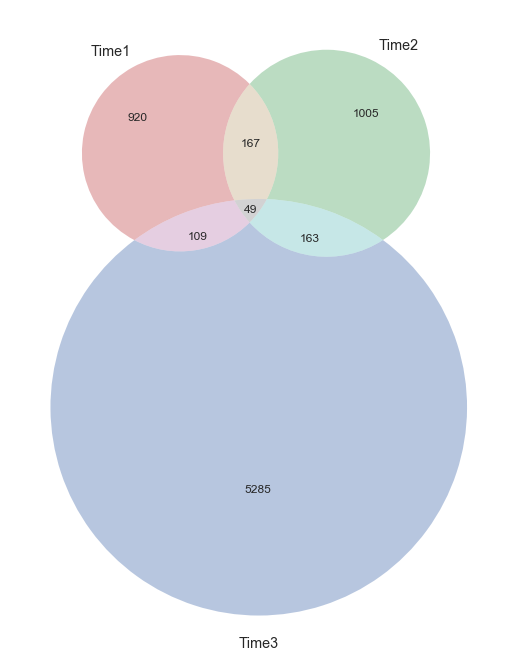

In [193]:
# Now that we have the three sets lets make our venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

venn3(list_of_sets_ids, ('Time1', 'Time2', 'Time3'))
plt.show()

In [38]:
# What about a heat map
# First I would like a heatmap of the intersection (only the 49 transcripts that we see in the middle of the Venn)

# This is really easy
# First lets define the id column as the index of our df

df_instersect_heatmap = df_time_annot_intersec.set_index('id')
df_instersect_heatmap.drop('sprot_Top_BLASTX_hit', axis=1, inplace=True)
df_instersect_heatmap.head()

,Time1,Time2,Time3
id,,,
EDO2102373|c1_g1_i7,11.049,9.919,10.253
EDO294141|c0_g1_i2,8.269,7.521,2.527
EDO294141|c0_g1_i3,8.995,9.524,2.638
EDO62622|c0_g2_i3,9.636,8.745,9.088
EDO2178796|c0_g1_i10,8.185,8.450,5.725


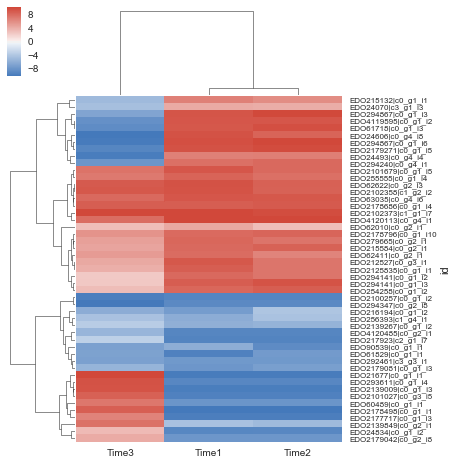

In [194]:
# Now let's build the heatmap
def cool_heatmap(df):
    cmap = sns.diverging_palette(250, 15, n=8, center="light", as_cmap=True)

    g = sns.clustermap(df, metric="euclidean",
                       method="complete",
                       robust=True,
                       figsize=(6, 8),
                       yticklabels=1,
                       cmap=cmap,

        )
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize = 8)

    plt.show()

cool_heatmap(df_instersect_heatmap)

In [40]:
# Now Let's do the same with the whole mergin data
df_merge_heatmap = df_time_merge.set_index('id')
df_merge_heatmap.head()

,Time1,Time2,Time3
id,,,
EDO2139267|c0_g1_i8,-10.269,0.0,-8.951
EDO61712|c1_g3_i1,-11.645,0.0,0.000
EDO2102112|c1_g2_i3,-11.645,0.0,-3.262
EDO212082|c0_g2_i1,11.503,0.0,0.000
EDO63554|c1_g4_i8,-11.690,0.0,0.000


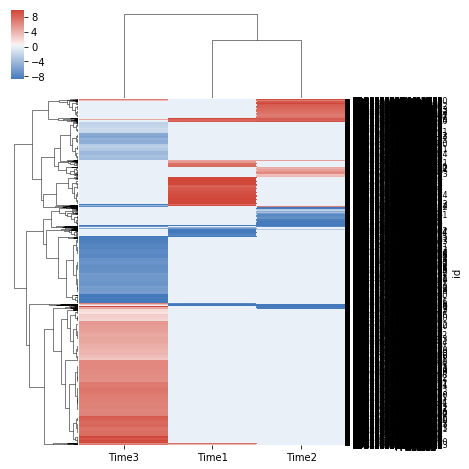

In [42]:
# Now just call our cool heatmap function
cool_heatmap(df_merge_heatmap)

### Vizualizing distribution of the logFC

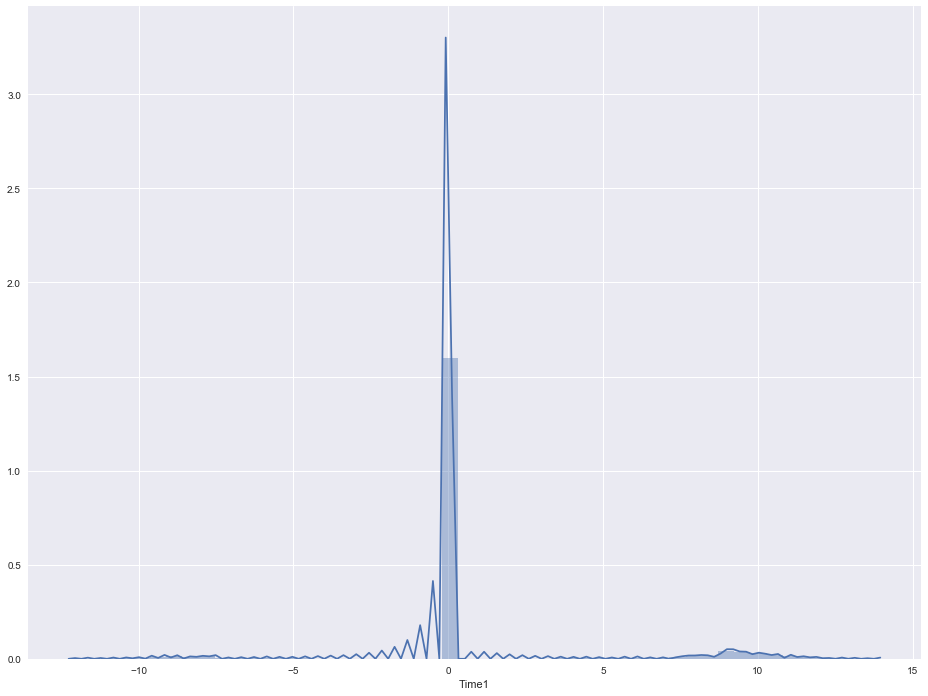

In [162]:
# A simple histogram with overlayed curve
sns.set(color_codes=True)
from scipy import stats

time1_logfc = df_merge_heatmap['Time1']
sns.distplot(time1_logfc);


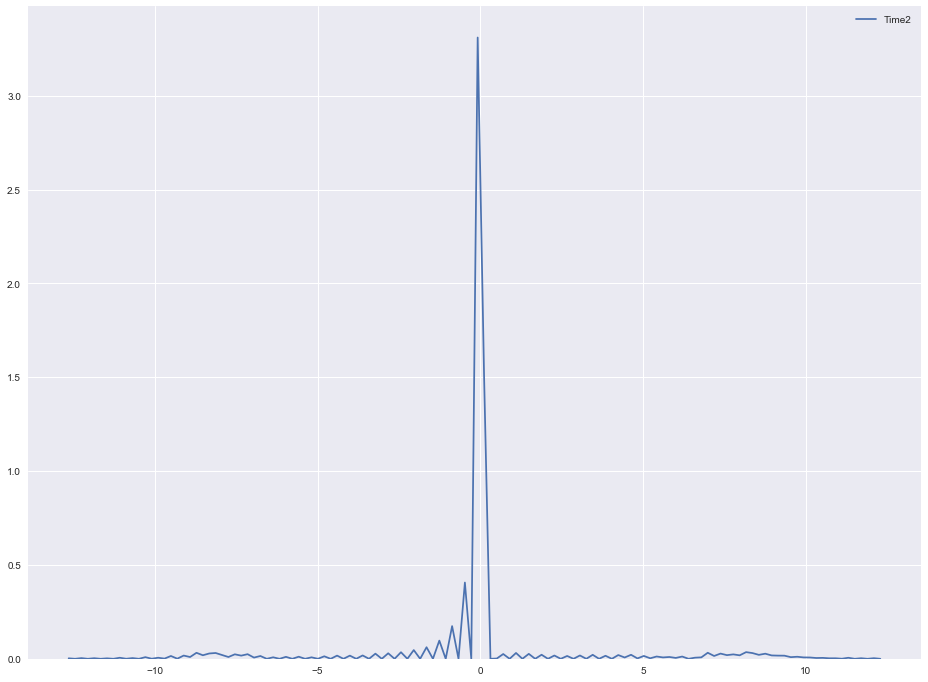

In [163]:
#a KDE (Kernel density estimation)
time2_logfc = df_merge_heatmap['Time2']
sns.kdeplot(time2_logfc, label="Time2")

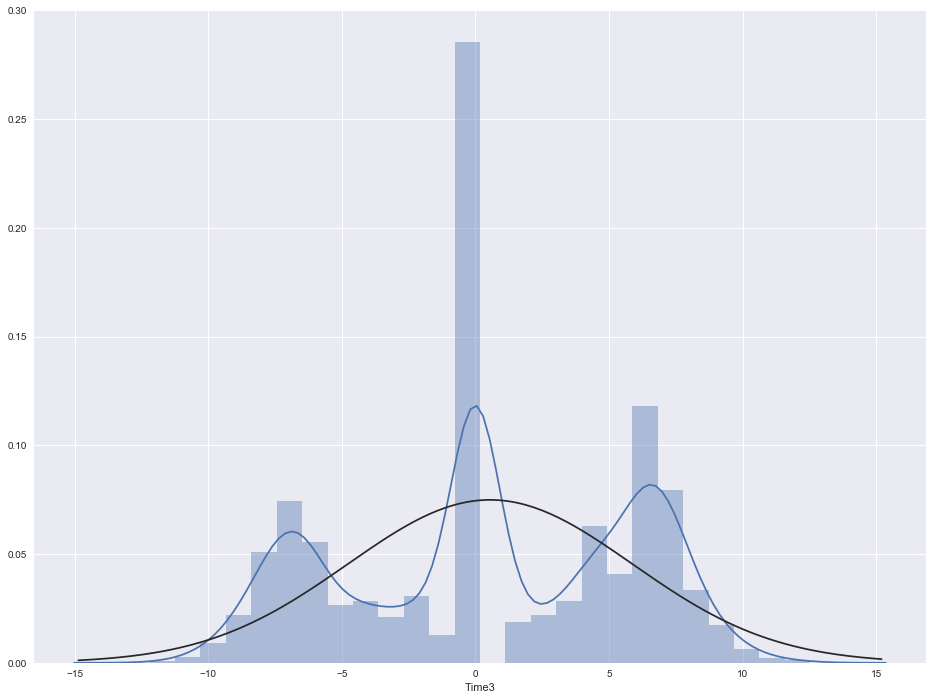

In [164]:
# Histogram with a fitted parametric distribution on top of it
time3_logfc = df_merge_heatmap['Time3']
sns.distplot(time3_logfc, kde=True, fit=stats.norm)


In [169]:
# Let's test if our distributions are normal 
from scipy.stats import shapiro

def am_i_nomral(data):
    
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')


list_logFcs = [time1_logfc, time2_logfc, time3_logfc]

for i,log in enumerate(list_logFcs):
    print("Time" + str(i + 1))
    am_i_nomral(log)


Time1
Statistics=0.554, p=0.000
Sample does not look Gaussian (reject H0)

Time2
Statistics=0.601, p=0.000
Sample does not look Gaussian (reject H0)

Time3
Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)



# Let see the distribution of logFC and FDR

In [149]:
# This is our initial df
df_time1.head()



,id,log_FC,edger.p.value,edger.adj.p.value,sprot_Top_BLASTX_hit
0,EDO2139267|c0_g1_i8,-10.269,1.000000e-14,1.600000e-09,.
1,EDO61712|c1_g3_i1,-11.645,4.100000e-14,2.700000e-09,.
2,EDO2102112|c1_g2_i3,-11.645,5.300000e-14,2.700000e-09,"PIP22_MAIZE^PIP22_MAIZE^Q:1-81,H:265-291^92.59..."
3,EDO212082|c0_g2_i1,11.503,1.200000e-13,4.400000e-09,"CHS2_RUTGR^CHS2_RUTGR^Q:94-1263,H:4-393^69.487..."
4,EDO63554|c1_g4_i8,-11.690,1.400000e-13,4.400000e-09,.


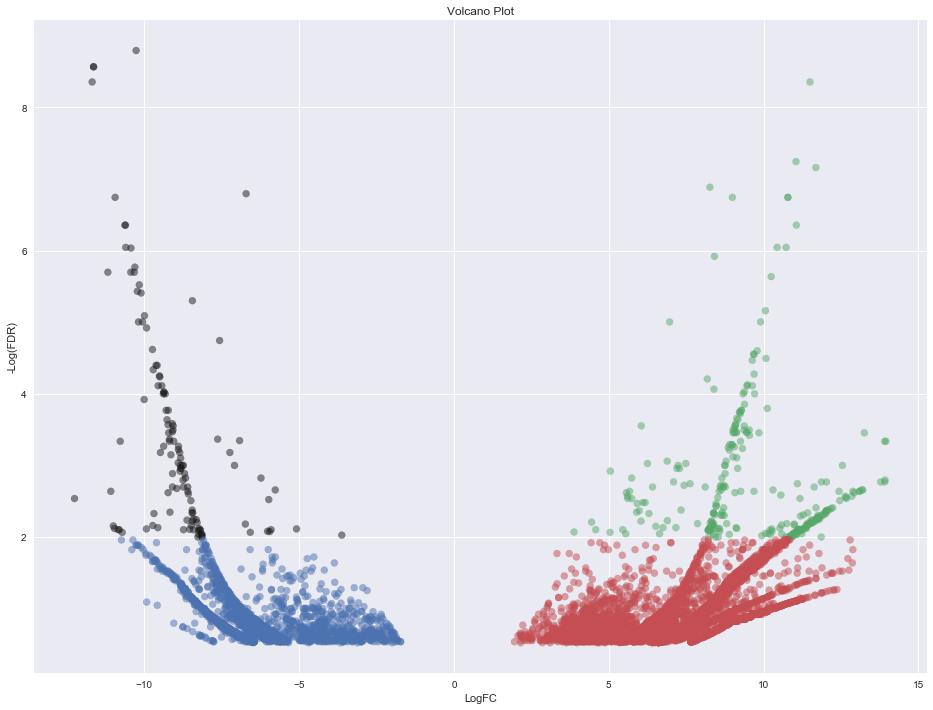

In [192]:
def volcano(df):
    
    fdr = df['edger.adj.p.value']
    logfc = df['log_FC']

    # If logfc > 1 and fdr < 1.9999 (meaning p=0.01) -> red ("up" very sure)
    # elsif fdr < 1.999 (meaning p=0.01) -> blue ('down' very sure)
    # elsif logfc > 1 ( meaning with high FDR) green
    # else logfc < 1 fdr > 1.9999 black
    # np.where(condition, then, else) it can be nested np.where(condition, then, np.where(condition, then, else))
    col = np.where((logfc >1) & (fdr < 1.99999),'r', np.where(fdr < 1.99999,'b', np.where(logfc >1,'g','k')))

    plt.scatter(logfc, fdr,  c=col, alpha=0.5)
    plt.title('Volcano Plot')
    plt.xlabel('LogFC')
    plt.ylabel('-Log(FDR)')
    plt.show()
    
    

df_volcano_t1 = df_time1.loc[:, ['edger.adj.p.value','log_FC']]
df_volcano_t1['edger.adj.p.value'] = df_volcano_t1['edger.adj.p.value'].apply(np.log10).apply(lambda x: x * (-1))

volcano(df_volcano_t1)



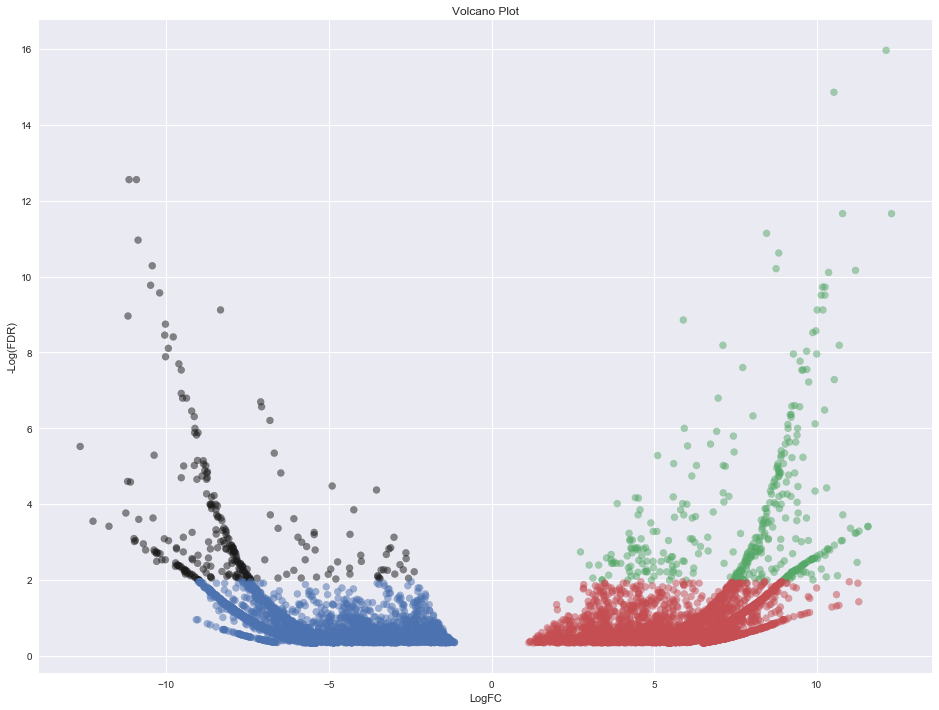

In [187]:
df_volcano_t2 = df_time2.loc[:, ['edger.adj.p.value','log_FC']]
df_volcano_t2['edger.adj.p.value'] = df_volcano_t2['edger.adj.p.value'].apply(np.log10).apply(lambda x: x * (-1))
volcano(df_volcano_t2)

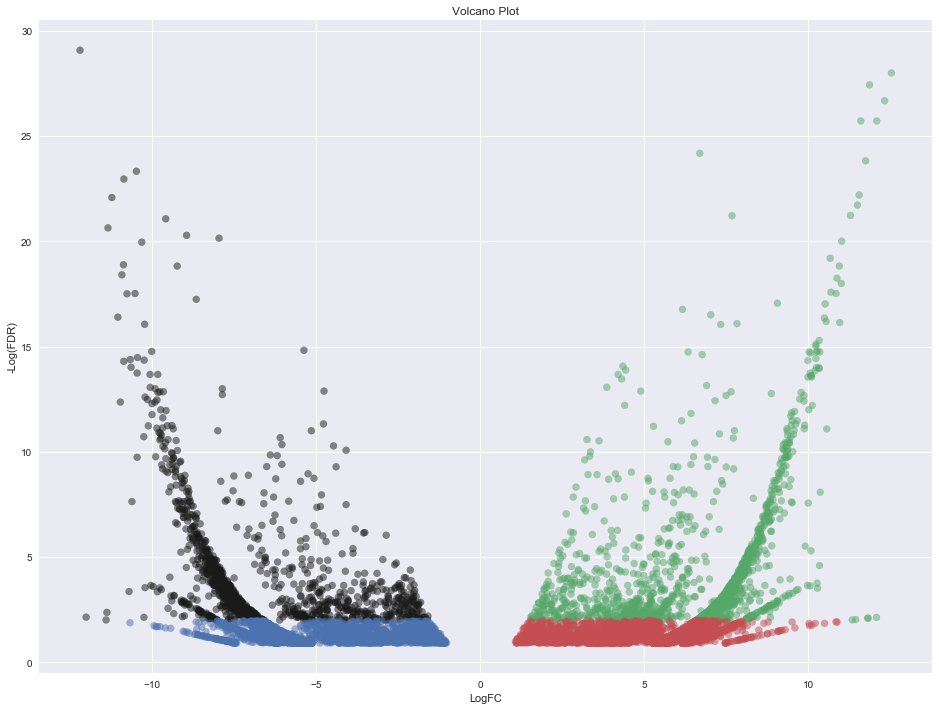

In [188]:
df_volcano_t3 = df_time3.loc[:, ['edger.adj.p.value','log_FC']]
df_volcano_t3['edger.adj.p.value'] = df_volcano_t3['edger.adj.p.value'].apply(np.log10).apply(lambda x: x * (-1))
volcano(df_volcano_t3)

In [195]:
# import scipy.stats as st
# import warnings
# warnings.filterwarnings('ignore')
# def get_best_distribution(data):
# ##     dist_names = ["norm", "exponweib"]
#     dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 
#                   'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 
#                   'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 
#                   'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 
#                   'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 
#                   'genlogistic', 'genpareto', 'genexpon', 'genextreme', 
#                   'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 
#                   'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 
#                   'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 
#                   'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 
#                   'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 
#                   'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 
#                   'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 
#                   'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 
#                   'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 
#                   'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 
#                   'weibull_min', 'weibull_max', 'wrapcauchy'] 
    
#     dist_results = []
#     params = {}
#     for dist_name in dist_names:
#         dist = getattr(st, dist_name)
#         param = dist.fit(data)

#         params[dist_name] = param
        
#         # Applying the Kolmogorov-Smirnov test
#         D, p = st.kstest(data, dist_name, args=param)
        
#         print("p value for "+ dist_name+ " = " + str(p))
#         dist_results.append((dist_name, p))

#     # select the best fitted distribution
#     best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    
   
    
#     # store the name of the best fit and its p value
#     print("Best fitting distribution: " + str(best_dist))
#     print("Best p value: " + str(best_p))
#     print("Parameters for the best fit: " + str(params[best_dist]))

#     return best_dist, best_p, params[best_dist]

# get_best_distribution(z)